# Data Exploration

In [ ]:
%pip install -r requirements.txt

In [138]:
import os
import random
import pandas as pd
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from utils import get_model, val_split_seed, seed, random_state, get_data, get_test_data
from datapreprocessing import preprocess, preprocess_no_removes


tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
tf.experimental.numpy.random.seed(seed)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(seed)


In [3]:
a = pd.read_csv("./BankA.csv")
b = pd.read_csv("./BankB.csv")
c = pd.read_csv("./BankC.csv")

In [18]:
a_samp = a.sample(n=100)
b_samp = b.sample(n=100)
c_samp = c.sample(n=100)

# a_b_samp = a_samp.append(b_samp, ignore_index=True)
# all_samp = a_b_samp.append(c_samp, ignore_index=True)

all_samp = pd.concat([a_samp, b_samp, c_samp], ignore_index=True)

c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

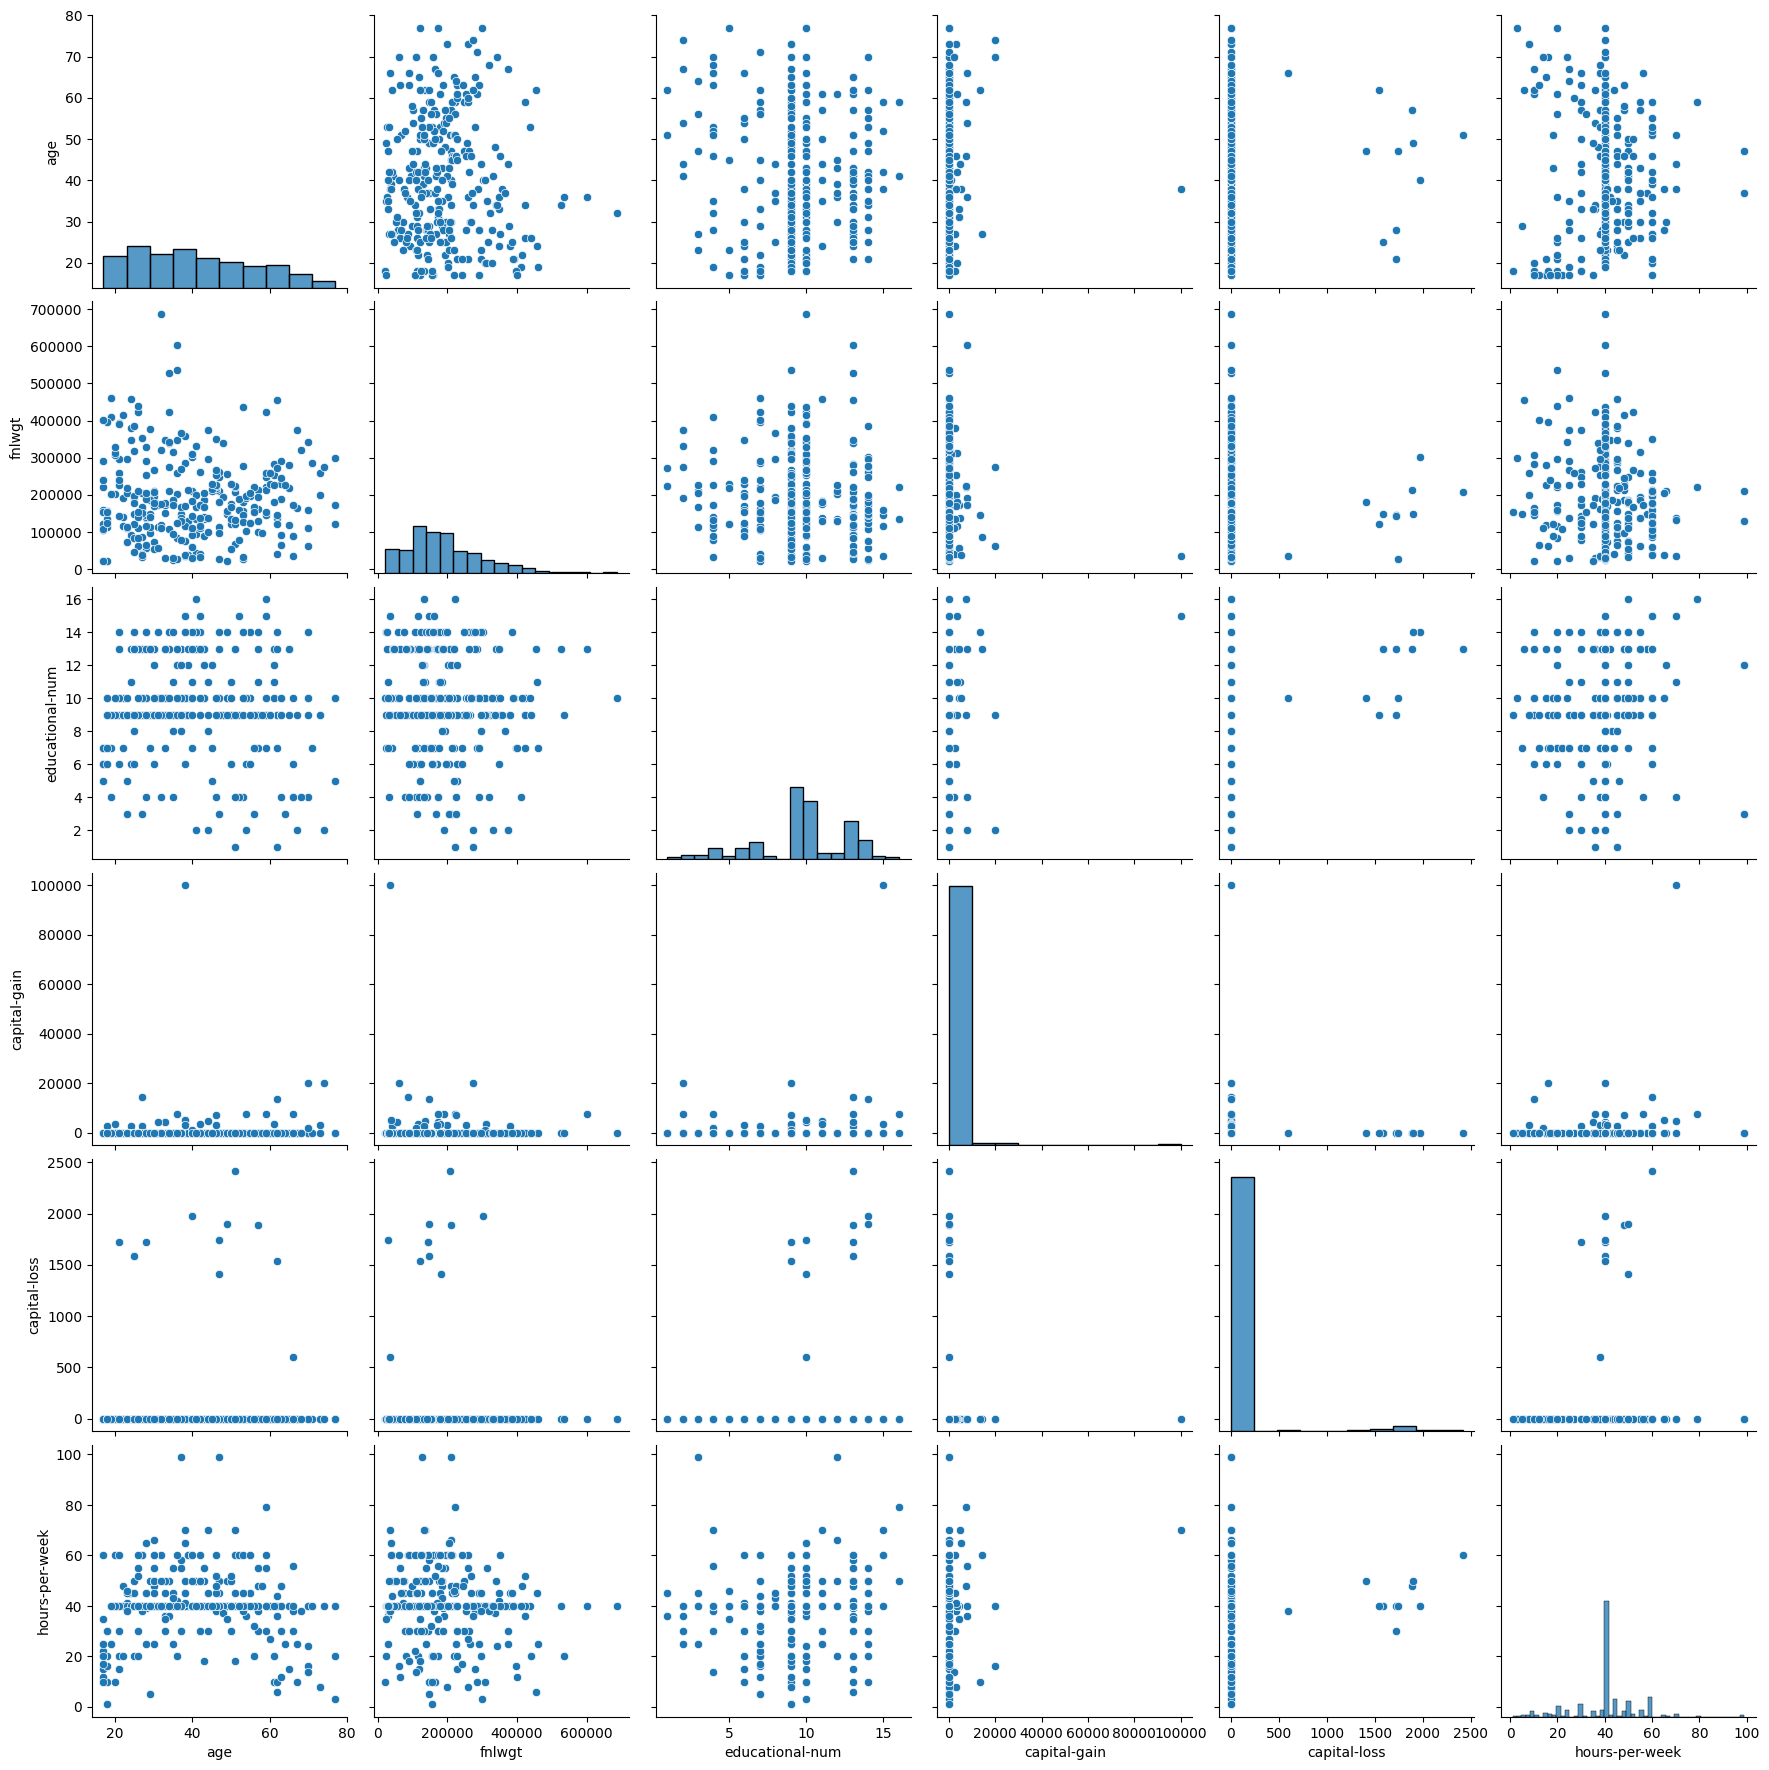

In [5]:
sns.pairplot(all_samp, height=3);

In [6]:
profile = ProfileReport(all_samp, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
all_samp.head(3)d

institute  age workclass  fnlwgt  education  educational-num  \
0    Bank A   41   Private   95220  Bachelors               13   
1    Bank A   40   Private  210413    HS-grad                9   
2    Bank A   30   Private  185835  Bachelors               13   

       marital-status       occupation   relationship   race  gender  \
0  Married-civ-spouse  Exec-managerial        Husband  White    Male   
1       Never-married  Exec-managerial      Unmarried  Black  Female   
2       Never-married  Protective-serv  Not-in-family  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              40  United-States  <=50K  
2             0             0              48  United-States  <=50K

In [19]:
# Native Country (Rassistisch?)
# Gender (sexismus)
# Race (Rassistisch!)
# Relationship (Husband, Wife einfach zu Married?)
# Educational-num oder education weg, je nach dem ob one hot encoding oder nicht

In [4]:
df = pd.concat([a, b, c], ignore_index=True)

In [5]:
# drop_this = ["institute","education","race","gender","native-country"]
# df = df.drop(drop_this, axis = 1)

In [6]:
# df.loc[df["relationship"].isin(["Husband", "Wife"]), "relationship"] = "Married"

In [7]:
# df.dtypes

In [8]:
# df = pd.get_dummies(df, columns=["workclass", "marital-status", "occupation", "relationship"])

In [9]:
# df = preprocess_no_removes(df)
df = preprocess(df)

In [10]:
df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   39  208353               13          7298             0              50   
1   42  189986               13             0             0              55   
2   56  321827               13             0             0              15   
3   34   33945               13             0             0              40   
4   66   31438               13         15024             0              40   

  income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0   >50K        False                  False                False  ...   
1   >50K        False                  False                False  ...   
2  <=50K         True                  False                False  ...   
3  <=50K        False                  False                False  ...   
4   >50K        False                  False                False  ...   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                      False                       False             False   
1                      False                       False             False   
2                      False                       False             False   
3                      False                       False              True   
4                      False                       False              True   

   occupation_Tech-support  occupation_Transport-moving  relationship_Married  \
0                    False                        False                  True   
1                     True                        False                  True   
2                    False                        False                 False   
3                    False                        False                  True   
4                    False                        False                  True   

   relationship_Not-in-family  relationship_Other-relative  \
0                       False                        False   
1                       False                        False   
2                       False                         True   
3                       False                        False   
4                       False                        False   

   relationship_Own-child  relationship_Unmarried  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  

[5 rows x 43 columns]

In [11]:
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=val_split_seed)

In [141]:

def get_test_data(ds_type, all_columns = False, labels_as_int=True):
    if ds_type == 'A':
        test = pd.read_csv("./BankA_Test.csv", index_col=0)
    elif ds_type == 'B':
        test = pd.read_csv("./BankB_Test.csv", index_col=0)
    elif ds_type == 'C':
        test = pd.read_csv("./BankC_Test.csv", index_col=0)
    else:
        test = pd.read_csv("./All_Banks_Test.csv", index_col=0)

    if all_columns:
        test = preprocess_no_removes(test)
    else:
        test = preprocess(test)

    if labels_as_int:
        test['income'] = test['income'].map({'>50K': 1, '<=50K': 0})

    X_test = test.drop('income', axis=1)
    y_test = test['income']

    return X_test, y_test

In [121]:
def get_data(ds_type, all_columns = False, labels_as_int=True):
    if ds_type == 'A':
        train = pd.read_csv("./BankA_Train.csv", index_col=0)
        val = pd.read_csv("./BankA_Val.csv", index_col=0)
    elif ds_type == 'B':
        train = pd.read_csv("./BankB_Train.csv", index_col=0)
        val = pd.read_csv("./BankB_Val.csv", index_col=0)
    elif ds_type == 'C':
        train = pd.read_csv("./BankC_Train.csv", index_col=0)
        val = pd.read_csv("./BankC_Val.csv", index_col=0)
        
    else:
        train_a = pd.read_csv("./BankA_Train.csv", index_col=0)
        val_a = pd.read_csv("./BankA_Val.csv", index_col=0)
        train_b = pd.read_csv("./BankB_Train.csv", index_col=0)
        val_b = pd.read_csv("./BankB_Val.csv", index_col=0)
        train_c = pd.read_csv("./BankC_Train.csv", index_col=0)
        val_c = pd.read_csv("./BankC_Val.csv", index_col=0)
        train = pd.concat([train_a, train_b, train_c], ignore_index=True)
        val = pd.concat([val_a, val_b, val_c], ignore_index=True)

    
    if all_columns:
        train = preprocess_no_removes(train)
        val = preprocess_no_removes(val)
    else:
        train = preprocess(train)
        val = preprocess(val)

    if labels_as_int:
        train['income'] = train['income'].map({'>50K': 1, '<=50K': 0})
        val['income'] = val['income'].map({'>50K': 1, '<=50K': 0})

    X_train = train.drop('income', axis=1)
    y_train = train['income']
    X_val = val.drop('income', axis=1)
    y_val = val['income']

    return X_train, y_train, X_val, y_val

## Load centralised aggregated data

In [130]:
X_train, y_train, X_val, y_val = get_data(ds_type = 'all')

In [142]:
X_test, y_test = get_test_data(ds_type = 'all')

In [145]:
y_train

0         1
1         1
2         0
3         0
4         1
         ..
575994    0
575995    0
575996    0
575997    0
575998    0
Name: income, Length: 575999, dtype: int64

In [143]:
X_test

age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       57  101242               16         25236             0   
1       53  150574               11             0             0   
2       53  411611               14             0             0   
3       64  137199                4             0             0   
4       38   95825                9             0             0   
...    ...     ...              ...           ...           ...   
79995   41  190211                6             0             0   
79996   27  190107                6             0             0   
79997   31   84852               10             0             0   
79998   35  105802                9             0             0   
79999   24   69232                5             0             0   

       hours-per-week  workclass_?  workclass_Federal-gov  \
0                  45        False                  False   
1                  50        False                  False   
2                  40        False                  False   
3                  30        False                  False   
4                  48        False                  False   
...               ...          ...                    ...   
79995              40        False                  False   
79996              25         True                  False   
79997              40        False                  False   
79998              38        False                  False   
79999              10        False                  False   

       workclass_Local-gov  workclass_Never-worked  ...  \
0                    False                   False  ...   
1                    False                   False  ...   
2                    False                   False  ...   
3                    False                   False  ...   
4                    False                   False  ...   
...                    ...                     ...  ...   
79995                False                   False  ...   
79996                False                   False  ...   
79997                False                   False  ...   
79998                False                   False  ...   
79999                False                   False  ...   

       occupation_Prof-specialty  occupation_Protective-serv  \
0                           True                       False   
1                          False                       False   
2                           True                       False   
3                          False                       False   
4                          False                       False   
...                          ...                         ...   
79995                      False                       False   
79996                      False                       False   
79997                      False                       False   
79998                      False                       False   
79999                      False                       False   

       occupation_Sales  occupation_Tech-support  occupation_Transport-moving  \
0                 False                    False                        False   
1                 False                    False                        False   
2                 False                    False                        False   
3                 False                    False                        False   
4                 False                    False                        False   
...                 ...                      ...                          ...   
79995              True                    False                        False   
79996             False                    False                        False   
79997             False                    False                        False   
79998             False                    False                        False   
79999             False                     True                        False   

       relationshi

In [146]:
# Modelle für Klassifikation
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(random_state=random_state),
          'Random Forest': RandomForestClassifier(random_state=random_state),
          'Gradient Boosting': GradientBoostingClassifier(random_state=random_state)}

# Evaluation Metriken für Klassifikation
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Cohen\'s Kappa': []}

# Modellentwicklung und Evaluation
for model_name, model in models.items():
    # Modell anpassen
    model.fit(X_train, y_train)
    
    # Vorhersagen
    predictions = model.predict(X_test)
    
    # Metriken
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)
    kappa = cohen_kappa_score(y_test, predictions)
    
    # Ergebnisse speichern
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Cohen\'s Kappa'].append(kappa)
    
    # Metriken anzeigen
    print("Klassifikationsbericht:\n", classification_report(y_test, predictions))
    print(f"{model_name}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nCohen's Kappa: {kappa:.2f}\n{'='*40}")

# Ergebnisse in ein DataFrame konvertieren, um sie besser zu visualisieren
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     60000
           1       0.72      0.28      0.40     20000

    accuracy                           0.79     80000
   macro avg       0.76      0.62      0.64     80000
weighted avg       0.78      0.79      0.76     80000

Logistic Regression
Accuracy: 0.79
Precision: 0.72
Recall: 0.28
F1 Score: 0.40
Cohen's Kappa: 0.30
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     60000
           1       0.61      0.62      0.61     20000

    accuracy                           0.81     80000
   macro avg       0.74      0.74      0.74     80000
weighted avg       0.81      0.81      0.81     80000

Decision Tree
Accuracy: 0.81
Precision: 0.61
Recall: 0.62
F1 Score: 0.61
Cohen's Kappa: 0.48
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.88 

Model  Accuracy  Precision   Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.856812   0.783003  0.59105  0.673619       0.584188
2        Random Forest  0.841263   0.710052  0.61700  0.660264       0.557364
1        Decision Tree  0.805600   0.609384  0.61950  0.614400       0.484453
0  Logistic Regression  0.791713   0.715987  0.27655  0.398990       0.301708

In [18]:
# df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
# y = df['income']
# X = df.drop('income', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Für binäre Klassifikation

# # Kompilieren des Modells
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', 
#               metrics=[
#                     'accuracy', 
#                     tf.keras.metrics.Recall(thresholds=0.5),
#                     tf.keras.metrics.Precision(thresholds=0.5)
#                 ])

# # Konvertieren der Daten in Tensoren (sollte das auf 0-1 skaliert sein?)
# X_train_tensor = tf.convert_to_tensor(np.asarray(X_train).astype('float32'))
# y_train_tensor = tf.convert_to_tensor(np.asarray(y_train).astype('float32'))
# X_test_tensor = tf.convert_to_tensor(np.asarray(X_test).astype('float32'))
# y_test_tensor = tf.convert_to_tensor(np.asarray(y_test).astype('float32'))

# # Trainieren des Modells
# model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32)

# # Bewertung des Modells
# loss, accuracy, recall, precision = model.evaluate(X_test_tensor, y_test_tensor)

# results['Model'].append('Neural Network')
# results['Accuracy'].append(accuracy)
# results['Precision'].append(precision)
# results['Recall'].append(recall)
# results['F1 Score'].append(np.nan)
# results['Cohen\'s Kappa'].append(np.nan)
# pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Neural Network

In [180]:
input_shape = [X_train.shape[1]]

In [185]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

In [182]:
config = {'lr': 'noCustomLr'}

In [233]:
def get_model(config, input_shape, weights=None):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        # layers.Dense(1028, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.3),
        # layers.Dense(512, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.3),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(512, activation='relu'), 
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid'),
    ])
    
    opt = tf.keras.optimizers.Adam()
    if config["lr"] != 'noCustomLr':
        print('used optimizer without lr')
        opt = tf.keras.optimizers.Adam(config["lr"])

    loss='binary_crossentropy'
    metrics = ['binary_accuracy',
            #    tfa.metrics.CohenKappa(num_classes=train_generator.num_classes, weightage='quadratic'),
            #    tfa.metrics.F1Score(num_classes=train_generator.num_classes, threshold=0.5),
            tf.keras.metrics.Recall(thresholds=0.5),
            tf.keras.metrics.Precision(thresholds=0.5),
            # cohen_kappa
            ] #added all metrics here but recall is the most important for our usecase

    model.compile(loss=loss,
                optimizer = opt,
                metrics = metrics)
    
    if weights is not None:
        model.set_weights(weights)

    return model


In [234]:
# Train
NeuralNet = get_model(config, input_shape)
history = NeuralNet.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=6
)

Epoch 1/6
1125/1125 [==============================] - 38s 33ms/step - loss: 0.3501 - binary_accuracy: 0.8409 - recall_21: 0.6041 - precision_21: 0.7119 - val_loss: 0.3247 - val_binary_accuracy: 0.8503 - val_recall_21: 0.5992 - val_precision_21: 0.7518
Epoch 2/6
1125/1125 [==============================] - 38s 34ms/step - loss: 0.3278 - binary_accuracy: 0.8488 - recall_21: 0.6035 - precision_21: 0.7400 - val_loss: 0.3226 - val_binary_accuracy: 0.8512 - val_recall_21: 0.6152 - val_precision_21: 0.7453
Epoch 3/6
1125/1125 [==============================] - 38s 34ms/step - loss: 0.3260 - binary_accuracy: 0.8499 - recall_21: 0.6057 - precision_21: 0.7426 - val_loss: 0.3214 - val_binary_accuracy: 0.8509 - val_recall_21: 0.6191 - val_precision_21: 0.7419
Epoch 4/6
1125/1125 [==============================] - 37s 33ms/step - loss: 0.3246 - binary_accuracy: 0.8498 - recall_21: 0.6047 - precision_21: 0.7430 - val_loss: 0.3216 - val_binary_accuracy: 0.8520 - val_recall_21: 0.6044 - val_precision

In [235]:
loss, accuracy, recall, precision = NeuralNet.evaluate(X_test, y_test)
y_probs = NeuralNet.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1 = f1_score(y_test, y_pred)


2500/2500 [==============================] - 5s 2ms/step


In [236]:
data = {
    'Model': ['Gradient Boosting', 'Random Forest', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [0.856812, 0.841263, 0.805600, 0.791713],
    'Precision': [0.783003, 0.710052, 0.609384, 0.715987],
    'Recall': [0.59105, 0.61700, 0.61950, 0.27655],
    'F1 Score': [0.673619, 0.660264, 0.614400, 0.398990],
    "Cohen's Kappa": [0.584188, 0.557364, 0.484453, 0.301708]
}

results = pd.DataFrame(data)
display(results)


Model  Accuracy  Precision   Recall  F1 Score  Cohen's Kappa
0    Gradient Boosting  0.856812   0.783003  0.59105  0.673619       0.584188
1        Random Forest  0.841263   0.710052  0.61700  0.660264       0.557364
2        Decision Tree  0.805600   0.609384  0.61950  0.614400       0.484453
3  Logistic Regression  0.791713   0.715987  0.27655  0.398990       0.301708

In [237]:
# Assuming 'results' is your DataFrame
new_row = {
    'Model': 'Neural Network',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    "Cohen's Kappa": np.nan
}

# Adding a new row using loc
results.loc[len(results)] = new_row
results

Model  Accuracy  Precision   Recall  F1 Score  Cohen's Kappa
0    Gradient Boosting  0.856812   0.783003  0.59105  0.673619       0.584188
1        Random Forest  0.841263   0.710052  0.61700  0.660264       0.557364
2        Decision Tree  0.805600   0.609384  0.61950  0.614400       0.484453
3  Logistic Regression  0.791713   0.715987  0.27655  0.398990       0.301708
4       Neural Network  0.850537   0.737103  0.62510  0.676497            NaN

<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

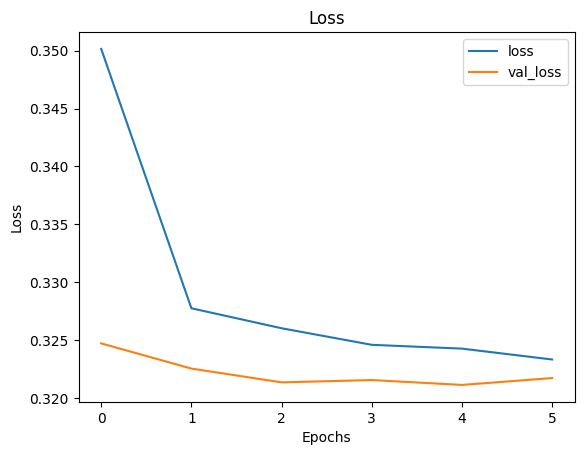

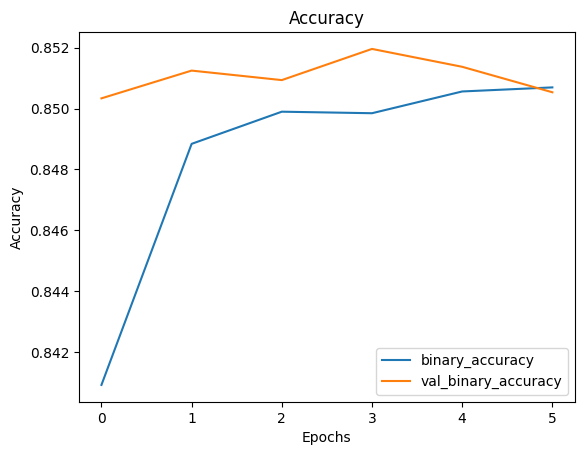

In [238]:
history_df = pd.DataFrame(history.history)
loss = history_df.loc[:, ['loss', 'val_loss']]
acc = history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']]
loss.plot(title="Loss", xlabel='Epochs', ylabel='Loss')
acc.plot(title="Accuracy", xlabel='Epochs', ylabel='Accuracy')

# global model - local performance

In [197]:
loss_A, accuracy_B, recall_B, precision_B = NeuralNet.evaluate(X_test_A, y_test_A)
y_probs = NeuralNet.predict(X_test_A)
y_pred = (y_probs > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_A = f1_score(y_test_A, y_pred)

707/707 [==============================] - 1s 1ms/step


In [198]:
# Evaluate the model on test data for bank B
loss_B, accuracy_B, recall_B, precision_B = NeuralNet.evaluate(X_test_B, y_test_B)
y_probs_B = NeuralNet.predict(X_test_B)
y_pred_B = (y_probs_B > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_B = f1_score(y_test_B, y_pred_B)

1261/1261 [==============================] - 2s 1ms/step


In [199]:
# Evaluate the model on test data for bank C
loss_C, accuracy_C, recall_C, precision_C = NeuralNet.evaluate(X_test_C, y_test_C)
y_probs_C = NeuralNet.predict(X_test_C)
y_pred_C = (y_probs_C > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_C = f1_score(y_test_C, y_pred_C)

534/534 [==============================] - 1s 1ms/step


In [202]:
# Define the column names
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create an empty DataFrame
local_results = pd.DataFrame(columns=columns)


# Assuming 'results' is your DataFrame
new_row_A = {'Model': 'Neural Network_A', 'Accuracy': accuracy_A, 'Precision': precision_A, 'Recall': recall_A, 'F1 Score': f1_A}
# Adding a new row for model A using loc
local_results.loc[len(local_results)] = new_row_A

new_row_B = {'Model': 'Neural Network_B', 'Accuracy': accuracy_B, 'Precision': precision_B, 'Recall': recall_B, 'F1 Score': f1_B}
# Adding a new row for model B using loc
local_results.loc[len(local_results)] = new_row_B

new_row_C = {'Model': 'Neural Network_C', 'Accuracy': accuracy_C, 'Precision': precision_C, 'Recall': recall_C, 'F1 Score': f1_C}
# Adding a new row for model C using loc
local_results.loc[len(local_results)] = new_row_C


In [203]:
local_results

Model  Accuracy  Precision    Recall  F1 Score
0  Neural Network_A  0.817563   0.741020  0.782800  0.744612
1  Neural Network_B  0.842278   0.685911  0.493840  0.574240
2  Neural Network_C  0.871630   0.681496  0.463549  0.551781

In [206]:

# Model for classification
model = LogisticRegression()

# Evaluation metrics for classification
results = {'Model': [], 'Test_Set': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Test sets
test_sets = {'X_test_A': X_test_A, 'X_test_B': X_test_B, 'X_test_C': X_test_C}
test_sets_y = [y_test_A, y_test_B, y_test_C]
bank = ['A', 'B', 'C']

# Model training
model.fit(X_train, y_train)

cnt = 0
# Model development and evaluation
for test_set_name, test_set in test_sets.items():

    # Predictions
    predictions = model.predict(test_set)
    
    # Metrics
    accuracy = accuracy_score(test_sets_y[cnt], predictions)
    precision = precision_score(test_sets_y[cnt], predictions)
    recall = recall_score(test_sets_y[cnt], predictions)
    f1 = f1_score(test_sets_y[cnt], predictions)
    name = 'LogisticRegression_' + bank[cnt]
    cnt += 1

    new_row = {'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    # Adding a new row for model C using loc
    local_results.loc[len(local_results)] = new_row
    

In [207]:
local_results

Model  Accuracy  Precision    Recall  F1 Score
0      Neural Network_A  0.817563   0.741020  0.782800  0.744612
1      Neural Network_B  0.842278   0.685911  0.493840  0.574240
2      Neural Network_C  0.871630   0.681496  0.463549  0.551781
3  LogisticRegression_A  0.715069   0.807777  0.306411  0.444291
4  LogisticRegression_B  0.811353   0.662447  0.253080  0.366242
5  LogisticRegression_C  0.846893   0.621511  0.260316  0.366941

# Train a Neural Network for each Bank separately

In [20]:
X_train_A, y_train_A, X_val_A, y_val_A = get_data('A')
X_train_B, y_train_B, X_val_B, y_val_B = get_data('B')
X_train_C, y_train_C, X_val_C, y_val_C = get_data('C')

In [21]:
# For dataset A
X_train_A = X_train_A.iloc[:, 1:]
X_val_A = X_val_A.iloc[:, 1:]

# For dataset B
X_train_B = X_train_B.iloc[:, 1:]
X_val_B = X_val_B.iloc[:, 1:]

# For dataset C
X_train_C = X_train_C.iloc[:, 1:]
X_val_C = X_val_C.iloc[:, 1:]


In [22]:
# Assuming X_train_A, y_train_A, X_val_A, y_val_A are numpy arrays
X_train_A = X_train_A.astype(np.float32)
y_train_A = y_train_A.astype(np.float32)
X_val_A = X_val_A.astype(np.float32)
y_val_A = y_val_A.astype(np.float32)

# Similarly for dataset B
X_train_B = X_train_B.astype(np.float32)
y_train_B = y_train_B.astype(np.float32)
X_val_B = X_val_B.astype(np.float32)
y_val_B = y_val_B.astype(np.float32)

# Similarly for dataset C
X_train_C = X_train_C.astype(np.float32)
y_train_C = y_train_C.astype(np.float32)
X_val_C = X_val_C.astype(np.float32)
y_val_C = y_val_C.astype(np.float32)


In [23]:
# Laden der Testdaten für jeden Buchstaben
X_test_A, y_test_A = get_test_data('A')
X_test_B, y_test_B = get_test_data('B')
X_test_C, y_test_C = get_test_data('C')

In [24]:
# For dataset A
X_test_A = X_test_A.iloc[:, 1:]

# For dataset B
X_test_B = X_test_B.iloc[:, 1:]

# For dataset C
X_test_C = X_test_C.iloc[:, 1:]


In [25]:
# Ersetzen von "train" durch "test" in den Variablennamen
X_test_A = X_test_A.astype(np.float32)
y_test_A = y_test_A.astype(np.float32)

X_test_B = X_test_B.astype(np.float32)
y_test_B = y_test_B.astype(np.float32)

X_test_C = X_test_C.astype(np.float32)
y_test_C = y_test_C.astype(np.float32)


In [26]:
X_train_A.shape[1]

42

In [27]:
config = {'lr': 'noCustomLr'}

In [28]:
input_shape = X_train_A.shape[1]
model_A = get_model(config, (input_shape,))

input_shape = X_train_B.shape[1]
model_B = get_model(config, (input_shape,))

input_shape = X_train_C.shape[1]
model_C = get_model(config, (input_shape,))

2024-02-01 13:01:19.049320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-01 13:01:19.050577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [29]:
# Train models
history = model_A.fit(
    X_train_A, y_train_A,
    validation_data=(X_val_A, y_val_A),
    batch_size=32,
    epochs=10
)

history = model_B.fit(
    X_train_B, y_train_B,
    validation_data=(X_val_B, y_val_B),
    batch_size=32,
    epochs=10
)

history = model_C.fit(
    X_train_C, y_train_C,
    validation_data=(X_val_C, y_val_C),
    batch_size=32,
    epochs=10
)

Epoch 1/10
5089/5089 [==============================] - 18s 3ms/step - loss: 0.4204 - binary_accuracy: 0.8053 - recall: 0.7330 - precision: 0.7382 - val_loss: 0.3993 - val_binary_accuracy: 0.8157 - val_recall: 0.7871 - val_precision: 0.7305
Epoch 2/10
5089/5089 [==============================] - 16s 3ms/step - loss: 0.4050 - binary_accuracy: 0.8118 - recall: 0.7360 - precision: 0.7502 - val_loss: 0.3938 - val_binary_accuracy: 0.8159 - val_recall: 0.7450 - val_precision: 0.7504
Epoch 3/10
5089/5089 [==============================] - 16s 3ms/step - loss: 0.4020 - binary_accuracy: 0.8142 - recall: 0.7368 - precision: 0.7546 - val_loss: 0.3919 - val_binary_accuracy: 0.8195 - val_recall: 0.7499 - val_precision: 0.7554
Epoch 4/10
5089/5089 [==============================] - 16s 3ms/step - loss: 0.4014 - binary_accuracy: 0.8134 - recall: 0.7358 - precision: 0.7535 - val_loss: 0.3900 - val_binary_accuracy: 0.8210 - val_recall: 0.7750 - val_precision: 0.7460
Epoch 5/10
5089/5089 [==============

In [37]:
loss_A, accuracy_A, recall_A, precision_A = model_A.evaluate(X_test_A, y_test_A)
loss_B, accuracy_B, recall_B, precision_B = model_B.evaluate(X_test_B, y_test_B)
loss_C, accuracy_C, recall_C, precision_C = model_C.evaluate(X_test_B, y_test_B)

1261/1261 [==============================] - 2s 2ms/step - loss: 0.3351 - binary_accuracy: 0.8432 - recall_2: 0.4999 - precision_2: 0.6868


In [63]:
from sklearn.metrics import f1_score

# Assuming you have already defined and trained your models: model_A, model_B, model_C

# Evaluating model A
loss_A, accuracy_A, recall_A, precision_A = model_A.evaluate(X_test_A, y_test_A)
y_probs_A = model_A.predict(X_test_A)
y_pred_A = (y_probs_A > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_A = f1_score(y_test_A, y_pred_A)


# Evaluating model B
loss_B, accuracy_B, recall_B, precision_B = model_B.evaluate(X_test_B, y_test_B)
y_probs_B = model_B.predict(X_test_B)
y_pred_B = (y_probs_B > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_B = f1_score(y_test_B, y_pred_B)

# Now y_pred_B contains binary predictions


# Evaluating model C
loss_C, accuracy_C, recall_C, precision_C = model_C.evaluate(X_test_C, y_test_C)
y_probs_C = model_C.predict(X_test_C)
y_pred_C = (y_probs_C > 0.5).astype(int)  # Assuming threshold of 0.5 for binary classification
f1_C = f1_score(y_test_C, y_pred_C)



534/534 [==============================] - 1s 1ms/step


In [97]:
# Define the column names
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create an empty DataFrame
results = pd.DataFrame(columns=columns)



# Assuming 'results' is your DataFrame
new_row_A = {'Model': 'Neural Network_A', 'Accuracy': accuracy_A, 'Precision': precision_A, 'Recall': recall_A, 'F1 Score': f1_A}
# Adding a new row for model A using loc
results.loc[len(results)] = new_row_A

new_row_B = {'Model': 'Neural Network_B', 'Accuracy': accuracy_B, 'Precision': precision_B, 'Recall': recall_B, 'F1 Score': f1_B}
# Adding a new row for model B using loc
results.loc[len(results)] = new_row_B

new_row_C = {'Model': 'Neural Network_C', 'Accuracy': accuracy_C, 'Precision': precision_C, 'Recall': recall_C, 'F1 Score': f1_C}
# Adding a new row for model C using loc
results.loc[len(results)] = new_row_C


In [98]:
results

Model  Accuracy  Precision    Recall  F1 Score
0  Neural Network_A  0.817563   0.741020  0.782800  0.761337
1  Neural Network_B  0.839153   0.708753  0.429822  0.535120
2  Neural Network_C  0.875498   0.697780  0.475585  0.565644

In [42]:

# # Load BankA.csv
# bankA_df = pd.read_csv('BankA.csv')
# print(bankA_df.shape)

# # Load BankB.csv
# bankB_df = pd.read_csv('BankB.csv')
# print(bankB_df.shape)

# # Load BankC.csv
# bankC_df = pd.read_csv('BankC.csv')
# print(bankC_df.shape)

# all_banks_df = pd.concat([bankA_df, bankB_df, bankC_df], ignore_index=True)
# print(all_banks_df.shape)


In [35]:
# # Define function to split data into train and test sets

# def split_data(df):
#     # Drop "race" and "gender" columns
#     df_processed = df.drop(['race', 'gender'], axis=1)
    
#     # Encode categorical variables
#     label_encoders = {}
#     for column in df_processed.select_dtypes(include=['object']).columns:
#         label_encoders[column] = LabelEncoder()
#         df_processed[column] = label_encoders[column].fit_transform(df_processed[column])
    
#     # Split data into features and target variable
#     X = df_processed.drop('income', axis=1)
#     y = df_processed['income']
    
#     # Split data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Scale features using MinMaxScaler
#     scaler = MinMaxScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     return X_train_scaled, X_test_scaled, y_train, y_test


In [36]:
# # Split data for Bank A
# X_trainA, X_testA, y_trainA, y_testA = split_data(bankA_df)

# # Split data for Bank B
# X_trainB, X_testB, y_trainB, y_testB = split_data(bankB_df)

# # Split data for Bank C
# X_trainC, X_testC, y_trainC, y_testC = split_data(bankC_df)

# # Split data for Bank C
# X_train_all, X_test_all, y_train_all, y_test_all = split_data(all_banks_df)


In [77]:
# # Define function to train logistic regression model
# def train_model(X_train, X_test, y_train, y_test, model):
#     # Train model
#     model.fit(X_train, y_train)
    
#     # Evaluate model
#     train_score = model.score(X_train, y_train)
#     test_score = model.score(X_test, y_test)

#     predictions = model.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     # precision = precision_score(y_test, predictions, pos_label='>50K')
#     precision = np.nan
#     # recall = recall_score(y_test, predictions, pos_label='>50K')
#     recall = np.nan
#     # f1 = f1_score(y_test, predictions, pos_label='>50K')
#     f1 = np.nan
#     kappa = cohen_kappa_score(y_test, predictions)

#     metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'kappa': kappa}

    
#     return model, train_score, test_score, metrics


## Train Models for each Bank separately

In [91]:
# # LogReg = LogisticRegression(max_iter=1000)

# # Train logistic regression models for each dataframe
# bankA_model_log, bankA_train_score_log, bankA_test_score_log, _metrics = train_model(X_train_A, X_test_A, y_train_A, y_test_A, model=LogisticRegression(max_iter=1000))
# bankB_model_log, bankB_train_score_log, bankB_test_score_log, _metrics = train_model(X_train_B, X_test_B, y_train_B, y_test_B, model=LogisticRegression(max_iter=1000))
# bankC_model_log, bankC_train_score_log, bankC_test_score_log, _metrics = train_model(X_train_C, X_test_C, y_train_C, y_test_C, model=LogisticRegression(max_iter=1000))

# # Display training and testing scores for each model
# print("Bank A - Training Score:", bankA_train_score_log)
# print("Bank A - Testing Score:", bankA_test_score_log)
# print("Bank B - Training Score:", bankB_train_score_log)
# print("Bank B - Testing Score:", bankB_test_score_log)
# print("Bank C - Training Score:", bankC_train_score_log)
# print("Bank C - Testing Score:", bankC_test_score_log)


In [99]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
LogReg = LogisticRegression(max_iter=1000)

# Train logistic regression models for each dataframe
bankA_model_log = LogReg.fit(X_train_A, y_train_A)
bankA_y_pred_log = bankA_model_log.predict(X_test_A)
bankA_train_score_log = accuracy_score(y_train_A, bankA_model_log.predict(X_train_A))
bankA_test_score_log = accuracy_score(y_test_A, bankA_y_pred_log)
bankA_recall_log = recall_score(y_test_A, bankA_y_pred_log)
bankA_precision_log = precision_score(y_test_A, bankA_y_pred_log)
bankA_f1_score_log = f1_score(y_test_A, bankA_y_pred_log)

bankB_model_log = LogReg.fit(X_train_B, y_train_B)
bankB_y_pred_log = bankB_model_log.predict(X_test_B)
bankB_train_score_log = accuracy_score(y_train_B, bankB_model_log.predict(X_train_B))
bankB_test_score_log = accuracy_score(y_test_B, bankB_y_pred_log)
bankB_recall_log = recall_score(y_test_B, bankB_y_pred_log)
bankB_precision_log = precision_score(y_test_B, bankB_y_pred_log)
bankB_f1_score_log = f1_score(y_test_B, bankB_y_pred_log)

bankC_model_log = LogReg.fit(X_train_C, y_train_C)
bankC_y_pred_log = bankC_model_log.predict(X_test_C)
bankC_train_score_log = accuracy_score(y_train_C, bankC_model_log.predict(X_train_C))
bankC_test_score_log = accuracy_score(y_test_C, bankC_y_pred_log)
bankC_recall_log = recall_score(y_test_C, bankC_y_pred_log)
bankC_precision_log = precision_score(y_test_C, bankC_y_pred_log)
bankC_f1_score_log = f1_score(y_test_C, bankC_y_pred_log)

# # Display training and testing scores for each model
# print("Bank A - Training Score:", bankA_train_score_log)
# print("Bank A - Testing Score:", bankA_test_score_log)
# print("Bank A - Recall:", bankA_recall_log)
# print("Bank A - Precision:", bankA_precision_log)
# print("Bank A - F1-score:", bankA_f1_score_log)

# print("Bank B - Training Score:", bankB_train_score_log)
# print("Bank B - Testing Score:", bankB_test_score_log)
# print("Bank B - Recall:", bankB_recall_log)
# print("Bank B - Precision:", bankB_precision_log)
# print("Bank B - F1-score:", bankB_f1_score_log)

# print("Bank C - Training Score:", bankC_train_score_log)
# print("Bank C - Testing Score:", bankC_test_score_log)
# print("Bank C - Recall:", bankC_recall_log)
# print("Bank C - Precision:", bankC_precision_log)
# print("Bank C - F1-score:", bankC_f1_score_log)


Bank A - Training Score: 0.7124872572741007
Bank A - Testing Score: 0.7148036788114609
Bank A - Recall: 0.34411799690733913
Bank A - Precision: 0.7555497518934448
Bank A - F1-score: 0.4728669499836548
Bank B - Training Score: 0.8123671783779316
Bank B - Testing Score: 0.8121466124392421
Bank B - Recall: 0.22371905584340818
Bank B - Precision: 0.6999279538904899
Bank B - F1-score: 0.33906290899572467
Bank C - Training Score: 0.8491467743511252
Bank C - Testing Score: 0.8485345838218054
Bank C - Recall: 0.2011691884456671
Bank C - Precision: 0.6914893617021277
Bank C - F1-score: 0.3116675546084177


In [100]:
# Assuming 'results' is your DataFrame
new_row_A = {'Model': 'Logistic_Regression_A', 'Accuracy': bankA_test_score_log, 'Precision': bankA_precision_log, 'Recall': bankA_recall_log, 'F1 Score': bankA_f1_score_log}
# Adding a new row for model A using loc
results.loc[len(results)] = new_row_A

# Assuming 'results' is your DataFrame
new_row_B = {'Model': 'Logistic_Regression_B', 'Accuracy': bankB_test_score_log, 'Precision': bankB_precision_log, 'Recall': bankB_recall_log, 'F1 Score': bankB_f1_score_log}
# Adding a new row for model B using loc
results.loc[len(results)] = new_row_B

new_row_C = {'Model': 'Logistic_Regression_C', 'Accuracy': bankC_test_score_log, 'Precision': bankC_precision_log, 'Recall': bankC_recall_log, 'F1 Score': bankC_f1_score_log}
# Adding a new row for model C using loc
results.loc[len(results)] = new_row_C

display(results)


Model  Accuracy  Precision    Recall  F1 Score
0       Neural Network_A  0.817563   0.741020  0.782800  0.761337
1       Neural Network_B  0.839153   0.708753  0.429822  0.535120
2       Neural Network_C  0.875498   0.697780  0.475585  0.565644
3  Logistic_Regression_A  0.714804   0.755550  0.344118  0.472867
4  Logistic_Regression_B  0.812147   0.699928  0.223719  0.339063
5  Logistic_Regression_C  0.848535   0.691489  0.201169  0.311668

In [83]:
# # LogReg = LogisticRegression(max_iter=1000)

# # Train logistic regression models for each dataframe
# bankA_model_log, bankA_train_score_log, bankA_test_score_log, _metrics = train_model(X_trainA, X_testA, y_trainA, y_testA, model=LogisticRegression(max_iter=1000))
# bankB_model_log, bankB_train_score_log, bankB_test_score_log, _metrics = train_model(X_trainB, X_testB, y_trainB, y_testB, model=LogisticRegression(max_iter=1000))
# bankC_model_log, bankC_train_score_log, bankC_test_score_log, _metrics = train_model(X_trainC, X_testC, y_trainC, y_testC, model=LogisticRegression(max_iter=1000))

# # Display training and testing scores for each model
# print("Bank A - Training Score:", bankA_train_score_log)
# print("Bank A - Testing Score:", bankA_test_score_log)
# print("Bank B - Training Score:", bankB_train_score_log)
# print("Bank B - Testing Score:", bankB_test_score_log)
# print("Bank C - Training Score:", bankC_train_score_log)
# print("Bank C - Testing Score:", bankC_test_score_log)

In [39]:
# # Create SVC model
# # svm_model = SVC()

# # Train SVM models for each dataframe
# #TODO WARUM NUR 1/10 DER DATEN?!!
# #TODO WARUM NICHT GESAMPLET?!!
# bankA_model_svm, bankA_train_score_svm, bankA_test_score_svm, _metrics = train_model(X_trainA[:len(X_trainA)//10], X_testA, y_trainA[:len(X_trainA)//10], y_testA, model=SVC())
# print('BankA Training finished')
# bankB_model_svm, bankB_train_score_svm, bankB_test_score_svm, _metrics = train_model(X_trainB[:len(X_trainB)//10], X_testB, y_trainB[:len(X_trainB)//10], y_testB, model=SVC())
# print('BankB Training finished')
# bankC_model_svm, bankC_train_score_svm, bankC_test_score_svm, _metrics = train_model(X_trainC[:len(X_trainC)//10], X_testC, y_trainC[:len(X_trainC)//10], y_testC, model=SVC())
# print('BankC Training finished')

# # Display training and testing scores for each model
# print("Bank A - Training Score:", bankA_train_score_svm)
# print("Bank A - Testing Score:", bankA_test_score_svm)
# print("Bank B - Training Score:", bankB_train_score_svm)
# print("Bank B - Testing Score:", bankB_test_score_svm)
# print("Bank C - Training Score:", bankC_train_score_svm)
# print("Bank C - Testing Score:", bankC_test_score_svm)

BankA Training finished
BankB Training finished
BankC Training finished
Bank A - Training Score: 0.8114187807439341
Bank A - Testing Score: 0.808944796940287
Bank B - Training Score: 0.8406646207259989
Bank B - Testing Score: 0.8418683662335086
Bank C - Training Score: 0.8762365355023082
Bank C - Testing Score: 0.8722119640083238


## Train Centralized Models

In [40]:
all_banks_model_log, all_banks_train_score_log, all_banks_test_score_log, metrics = train_model(X_train_all, X_test_all, y_train_all, y_test_all, model=LogisticRegression(max_iter=1000))
print("All Banks - Training Score:", bankA_train_score_log)
print("All Banks - Testing Score:", bankA_test_score_log)

results['Model'].append('Logistic Regression (D)')
results['Accuracy'].append(metrics['accuracy'])
results['Precision'].append(metrics['precision'])
results['Recall'].append(metrics['recall'])
results['F1 Score'].append(metrics['f1'])
results['Cohen\'s Kappa'].append(metrics['kappa'])
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

All Banks - Training Score: 0.7562827818339588
All Banks - Testing Score: 0.7540512457718922


Model  Accuracy  Precision    Recall  F1 Score  \
3        Gradient Boosting  0.858431   0.785505  0.592637  0.675575   
2            Random Forest  0.844150   0.719827  0.611333  0.661159   
8      Neural Network_V2_C  0.840319   0.697916  0.631185       NaN   
5        Neural Network_V2  0.837525   0.737023  0.539113       NaN   
7      Neural Network_V2_B  0.835913   0.677876  0.648373       NaN   
6      Neural Network_V2_A  0.835594   0.671803  0.662772       NaN   
4           Neural Network  0.832750   0.654498  0.693806       NaN   
9  Logistic Regression (D)  0.814412        NaN       NaN       NaN   
1            Decision Tree  0.806031   0.608052  0.619374  0.613661   
0      Logistic Regression  0.789781   0.704651  0.266491  0.386726   

   Cohen's Kappa  
3       0.587293  
2       0.560832  
8       0.000000  
5       0.000000  
7       0.000000  
6       0.000000  
4            NaN  
9       0.425516  
1       0.484185  
0       0.289780

In [41]:
all_banks_model_svm, all_banks_train_score_svm, all_banks_test_score_svm, metrics = train_model(X_train_all[:len(X_train_all)//10], X_test_all, y_train_all[:len(y_train_all)//10], y_test_all, model=SVC())
print("All Banks - Training Score:", all_banks_train_score_svm)
print("All Banks - Testing Score:", all_banks_test_score_svm)

results['Model'].append('SVC')
results['Accuracy'].append(metrics['accuracy'])
results['Precision'].append(metrics['precision'])
results['Recall'].append(metrics['recall'])
results['F1 Score'].append(metrics['f1'])
results['Cohen\'s Kappa'].append(metrics['kappa'])
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

All Banks - Training Score: 0.8435756808700136
All Banks - Testing Score: 0.84310625


Model  Accuracy  Precision    Recall  F1 Score  \
3         Gradient Boosting  0.858431   0.785505  0.592637  0.675575   
2             Random Forest  0.844150   0.719827  0.611333  0.661159   
10                      SVC  0.843106        NaN       NaN       NaN   
8       Neural Network_V2_C  0.840319   0.697916  0.631185       NaN   
5         Neural Network_V2  0.837525   0.737023  0.539113       NaN   
7       Neural Network_V2_B  0.835913   0.677876  0.648373       NaN   
6       Neural Network_V2_A  0.835594   0.671803  0.662772       NaN   
4            Neural Network  0.832750   0.654498  0.693806       NaN   
9   Logistic Regression (D)  0.814412        NaN       NaN       NaN   
1             Decision Tree  0.806031   0.608052  0.619374  0.613661   
0       Logistic Regression  0.789781   0.704651  0.266491  0.386726   

    Cohen's Kappa  
3        0.587293  
2        0.560832  
10       0.540731  
8        0.000000  
5        0.000000  
7        0.000000  
6        0.000000  
4             NaN  
9        0.425516  
1        0.484185  
0        0.289780